Q1 Fashion MNIST plot

4422102/4422102 [==============================] - 0s 0us/step


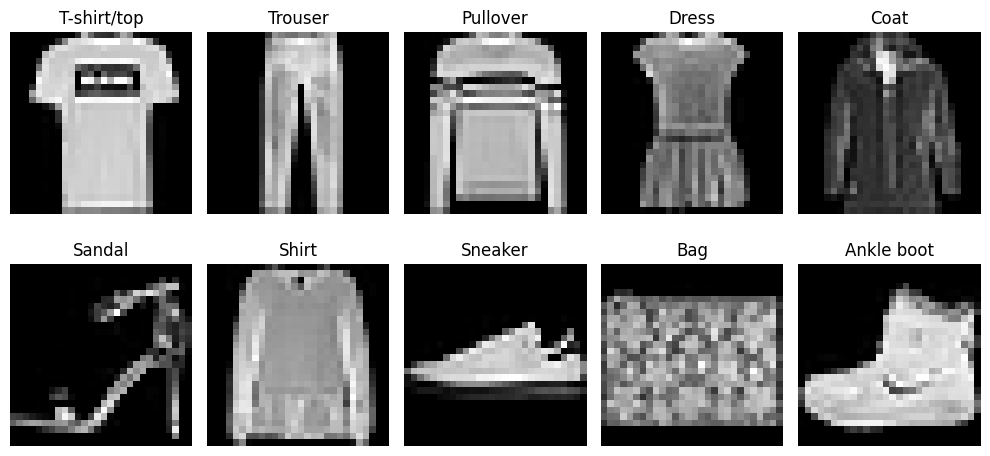

(60000, 28, 28)
(60000,)


In [2]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
# Load the Fashion-MNIST dataset
(images_to_train, labels_to_train), (test_images,test_labels) = fashion_mnist.load_data()
images_to_train=images_to_train/255.0
test_images=test_images/255.0
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Function to plot one sample image for each class
def plot_samples(images, labels, class_names):
    plt.figure(figsize=(10, 5))
    # for i in range(len(class_names)):
    i=0
    while i<len(class_names):
        # Find the index of the first image with the current class label
        idx = np.where(labels == i)[0][0]
        image = images[idx]
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
        i+=1
    plt.tight_layout()
    plt.show()
# Plot one sample image for each class
plot_samples(images_to_train, labels_to_train, class_names)
print(images_to_train.shape)
print(labels_to_train.shape)

Q2 feedforward neural network, forward propagation

In [16]:
import numpy as np
def initialize_w_and_b(no_of_layers,weight_func):
  total_neurons_per_layer=[]
  for i in range(no_of_layers):
    total_neurons_per_layer.append(int(input()))
  # print(total_neurons_per_layer)
  W_s=[]
  B_s=[]
  W_s.append(np.random.rand(total_neurons_per_layer[0],784))
  B_s.append(np.random.rand(total_neurons_per_layer[0],1))
  for i in range(1,no_of_layers):
    W_s.append(np.random.rand(total_neurons_per_layer[i],total_neurons_per_layer[i-1]))
    B_s.append(np.random.rand(total_neurons_per_layer[i],1))
  W_s.append(np.random.rand(10,total_neurons_per_layer[no_of_layers-1]))
  B_s.append(np.random.rand(10,1))
  return W_s,B_s
no_of_layers=int(input("Enter the number of layers:"))
# weights_list=[]
# biases_list=[]
w_s,b_s = initialize_w_and_b(no_of_layers,"Xavier")
print(w_s)
print(b_s)

Enter the number of layers:3
64
32
16
[array([[0.29039104, 0.89862987, 0.37115143, ..., 0.89233465, 0.65205019,
        0.28146329],
       [0.92591346, 0.96213842, 0.06644194, ..., 0.19562272, 0.63867047,
        0.49648678],
       [0.38266364, 0.34276721, 0.50767162, ..., 0.23349426, 0.59381987,
        0.47089981],
       ...,
       [0.40463167, 0.29891535, 0.6654177 , ..., 0.85978428, 0.40014789,
        0.83813932],
       [0.21229835, 0.5412018 , 0.42253064, ..., 0.76393547, 0.26473333,
        0.22754936],
       [0.47615262, 0.5845229 , 0.09770746, ..., 0.4198811 , 0.57608412,
        0.74057344]]), array([[5.32373277e-01, 7.53626953e-02, 5.13113696e-01, ...,
        4.26213282e-01, 1.90382576e-01, 4.89007526e-01],
       [6.64235403e-01, 4.19523532e-01, 5.29158848e-01, ...,
        4.65312503e-01, 5.12002963e-01, 5.91887935e-01],
       [2.34847567e-01, 8.80247797e-01, 3.34154963e-01, ...,
        4.61109021e-02, 2.93423949e-01, 8.26377136e-01],
       ...,
       [7.3866148

In [26]:
flattened_image=images_to_train[0].flatten().reshape((784,1))
def sigmoid_function(a_s):
  return 1/(1+np.exp(-a_s))
def soft_max_function(a_s):
  # sum_of_a=np.sum(np.exp(a_s))
  sum_of_a=0
  for i in range(len(a_s)):
    sum_of_a+=np.exp(a_s[i])
  # print(h_s.shape)
  print(a_s.shape)
  for i in range(10):
    a_s[i]=np.exp(a_s[i])/(sum_of_a)
  return a_s
def forward_propagation(w_s,b_s,flattened_image,no_of_layers,images_to_train):
  a_s=[]
  h_s=[]
  h_s.append(flattened_image)
  for i in range(no_of_layers):
    print(w_s[i].shape,flattened_image.shape)
    a_s.append(np.matmul(w_s[i],flattened_image)+b_s[i])
    h_s.append(sigmoid_function(a_s[i]))
    flattened_image=h_s[-1]
  a_s.append(np.matmul(w_s[-1],flattened_image)+b_s[-1])
  print(a_s[-1].shape)
  print(h_s[-1].shape)
  print(b_s[-1].shape)
  # print(a_s[-1])
  h_s.append(soft_max_function(a_s[-1]))
  # print(a_s[-1])
  print(h_s[-1].shape)
  return a_s,h_s
a_s,h_s=forward_propagation(w_s,b_s,flattened_image,no_of_layers,images_to_train)
# print(a_s[-1])
# print(np.sum(h_s[-1]))

(64, 784) (784, 1)
(32, 64) (64, 1)
(16, 32) (32, 1)
(10, 1)
(16, 1)
(10, 1)
(10, 1)
(10, 1)


In [ ]:
print(w_s[-1].shape)
print(h_s[-1].shape)

(10, 64)
(10, 1)


Q3: Backward_propagation Algorithms

In [34]:
# import numpy as np
# X = [0.5,2.5]
# Y = [0.2,0.9]

# def f(x,w,b):
#   return 1/(1+np.exp(-(w*x+b)))

# def error(w,b):
#   err = 0.0
#   for x,y in zip(X,Y):
#     fx = f(x,w,b)
#     err += (fx-y)**2
#   return 0.5*err

# def grad_b(x,w,b,y):
#   fx = f(x,w,b)
#   return (fx-y)*fx*(1-fx)

# def grad_w(x,w,b,y):
#   fx = f(x,w,b)
#   return (fx-y)*fx*(1-fx)*x

# def do_gradient_descent():

#   w,b,eta,max_epochs = -2,-2,1.0,1000

#   for i in range(max_epochs):
#     dw,db = 0,0
#     for x,y in zip(X,Y):
#       dw += grad_w(x,w,b,y)
#       db += grad_b(x,w,b,y)

#     w = w - eta*dw
#     b = b - eta*db
def cross_entropy_loss_function(h_s):
  return -np.log(h_s[np.argmax(h_s)])
def sigmoid_derivative(a_s):
  fx=sigmoid_function(a_s)
  return fx*(1-fx)
def backward_propagation(a_s,h_s,label_image,w_s,b_s):
  theta_w=[]
  theta_b=[]
  #compute with output param
  nabla_a_last=-(label_image-h_s[-1])
  for k in range(no_of_layers,-1,-1):
    #grd wrt parameters
    # print(h_s[k].shape)
    # print(nabla_a_last.shape)
    nabla_w_last=np.matmul(nabla_a_last,h_s[k].T)
    theta_w.append(nabla_w_last)
    nabla_b_last=nabla_a_last
    theta_b.append(nabla_b_last)
    if(k==0):
      break
    #grd wrt layers
    nabla_h_last=np.matmul(w_s[k].T,nabla_a_last)
    #wrt pre_activation
    nabla_a_last=np.multiply(nabla_h_last,sigmoid_derivative(a_s[k-1]))
  return theta_w,theta_b
label_image=np.zeros((10,1))
label_image[labels_to_train[0]]=1
backward_propagation(a_s,h_s,label_image,w_s,b_s)
loss=cross_entropy_loss_function(h_s[-1])
# print(h_s[-1][loss])
# print(loss)
# print("  ")
# print(h_s[-1])